# Predicting the Sales Price of Houses in Ames

The sales price of any specific house are based upon many types of features and characteristics that the house has. As such, this task is to make use of a dataset of housing sales in Ames, Iowa and tranform it into a predictive model that would help homeowners accurately judge the value of their houses for future and determine the points of improvement to increase the price.

With the help of regression modelling, predicting the sales price of a specific house is made possible with the help of various quantitative and qualitative housing data. Before all that, the data provided will undergo data cleaning and Exploratory Data Analysis (EDA) to further understand certain correlations and trends between the independent variables and the target variable.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

## Importing Data

In [2]:
#Importing data

train = pd.read_csv('datasets/train.csv')


## Data Cleaning

This is mainly to establish the types of data that are within the dataframe and to identify the null values within the columns.

In [3]:
#Data Checking

train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [5]:
train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [6]:
# Function to convert letters to lowercase and spaces to underscores (_)

def clean(data):
    train.columns = train.columns.str.lower()
    train.columns = train.columns.str.replace(' ', '_')
    
    return data

In [7]:
clean(train).head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
# The 'id' and 'pid' columns are dropped as they do not provide any predictive values for the model

train = train.drop(['id', 'pid'], axis = 1)

In [9]:
train.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Dealing with Missing Data

Based on the data description, NaN values in certain columns appear to represent the absence of the respective variable, therefore these variables will be identified and have the NaN values replaced by either 0 or 'None'.

In [10]:
#The function below will be used to find the NaN values within the dataframe and determine the null percentage of the
#respective columns.

def missing_pct(data):
    nan_pct = 100 * train.isnull().sum() / len(train)
    nan_pct = nan_pct[nan_pct > 0].sort_values()
    return nan_pct

In [11]:
pct_nan = missing_pct(train)

Text(0, 0.5, 'Percentage of Null Values')

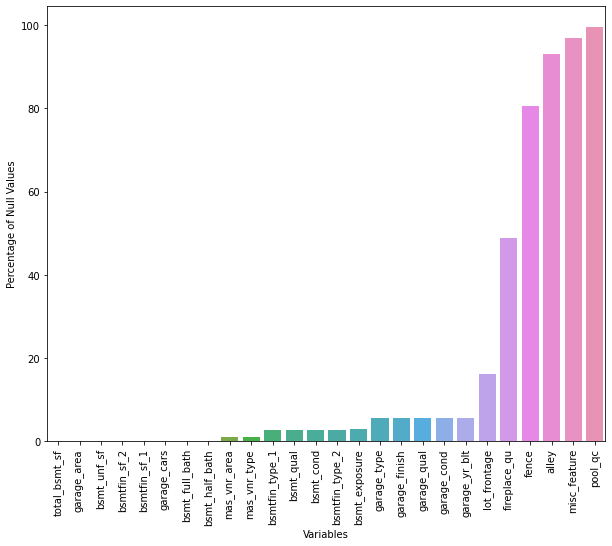

In [12]:
plt.figure(figsize = (10,8))
sns.barplot(x = pct_nan.index, y = pct_nan)
plt.xticks(rotation = 90)
plt.xlabel('Variables')
plt.ylabel('Percentage of Null Values')

Dealing with missing data within numerical variables:

In [13]:
bsmt_num = ['total_bsmt_sf', 'bsmt_unf_sf', 'bsmtfin_sf_2', 'bsmtfin_sf_1', 'bsmt_full_bath', 'bsmt_half_bath']
garage_num = ['garage_yr_blt', 'garage_cars', 'garage_area']

train[bsmt_num] = train[bsmt_num].fillna(0)
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)
train[garage_num] = train[garage_num].fillna(0)
train['lot_frontage'] = train['lot_frontage'].fillna(train['lot_frontage'].mean())

Dealing with missing data within categorical variables

In [14]:
bsmt_str = ['bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_type_2', 'bsmt_exposure']
garage_str = ['garage_type', 'garage_finish', 'garage_qual', 'garage_cond']

train[bsmt_str] = train[bsmt_str].fillna('None')
train[garage_str] = train[garage_str].fillna('None')

In [15]:
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')
train['fireplace_qu'] = train['fireplace_qu'].fillna('None')

The basement (bsmt) and garage columns are grouped together in their respective categories as a missing value in those rows could represent an absence of the housing feature, therefore the NaNs' are replaced with '0' or 'None'. Similarly, a lack of value within the masonry veneer (mas_vnr) and fireplace columns could indicate its absence, hence the respective numerical and categorical feature with missing values were filled with '0' or 'None'.

In [16]:
pct_nan = missing_pct(train)

Text(0, 0.5, 'Percentage of Null Values')

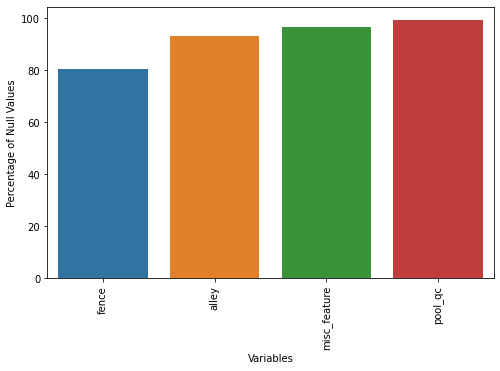

In [17]:
# Plotting the bar plot to identify the remaining columns with null values to be dealt with.

plt.figure(figsize = (8,5))
sns.barplot(x = pct_nan.index, y = pct_nan)
plt.xticks(rotation = 90)
plt.xlabel('Variables')
plt.ylabel('Percentage of Null Values')

In [18]:
pct_nan

fence           80.497318
alley           93.174061
misc_feature    96.830814
pool_qc         99.561190
dtype: float64

Of the remaining variables that still have missing values, there are 4 that have more than 80% of their rows missing, therefore they will not be predictive and contribute to the model. Hence, they will be dropped.

In [19]:
train = train.drop(['fence', 'alley', 'misc_feature', 'pool_qc'], axis = 1)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2051 non-null   int64  
 1   ms_zoning        2051 non-null   object 
 2   lot_frontage     2051 non-null   float64
 3   lot_area         2051 non-null   int64  
 4   street           2051 non-null   object 
 5   lot_shape        2051 non-null   object 
 6   land_contour     2051 non-null   object 
 7   utilities        2051 non-null   object 
 8   lot_config       2051 non-null   object 
 9   land_slope       2051 non-null   object 
 10  neighborhood     2051 non-null   object 
 11  condition_1      2051 non-null   object 
 12  condition_2      2051 non-null   object 
 13  bldg_type        2051 non-null   object 
 14  house_style      2051 non-null   object 
 15  overall_qual     2051 non-null   int64  
 16  overall_cond     2051 non-null   int64  
 17  year_built    

With all NaN values in the dataset either replaced or removed, the EDA can proceed.

## EDA

The visualisation, summarisation, and interpretation of the data helps us understand and establish which features would be best to include to facilitate the machine-learning modelling process. In this case, a few visualisations/plots were generated to determine the trend or correlations, and identify outliers (if any).

### Heatmap

<AxesSubplot:>

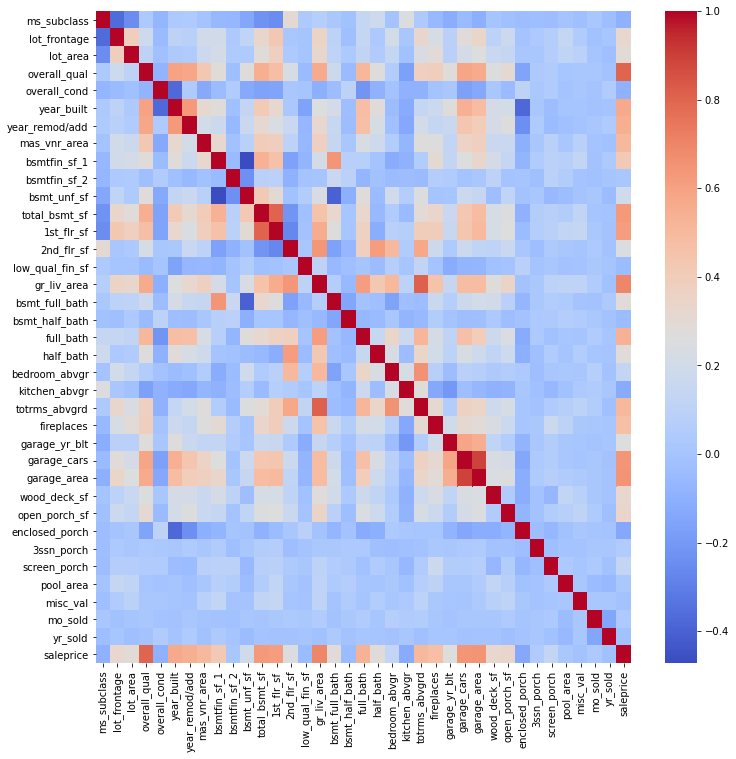

In [21]:
plt.figure(figsize = (12,12))
sns.heatmap(train.corr(), cmap = 'coolwarm')

In [22]:
# Identifying the correlations of different features with the sale price of each house.

train.corr()['saleprice'].sort_values()

enclosed_porch    -0.135656
kitchen_abvgr     -0.125444
overall_cond      -0.097019
ms_subclass       -0.087335
bsmt_half_bath    -0.045290
low_qual_fin_sf   -0.041594
yr_sold           -0.015203
misc_val          -0.007375
bsmtfin_sf_2       0.016432
pool_area          0.023106
mo_sold            0.032735
3ssn_porch         0.048732
screen_porch       0.134581
bedroom_abvgr      0.137067
bsmt_unf_sf        0.190861
2nd_flr_sf         0.248452
garage_yr_blt      0.258645
half_bath          0.283001
bsmt_full_bath     0.283332
lot_area           0.296566
lot_frontage       0.325850
wood_deck_sf       0.326490
open_porch_sf      0.333476
bsmtfin_sf_1       0.423856
fireplaces         0.471093
mas_vnr_area       0.503579
totrms_abvgrd      0.504014
full_bath          0.537969
year_remod/add     0.550370
year_built         0.571849
1st_flr_sf         0.618486
total_bsmt_sf      0.629303
garage_cars        0.647781
garage_area        0.649897
gr_liv_area        0.697038
overall_qual       0

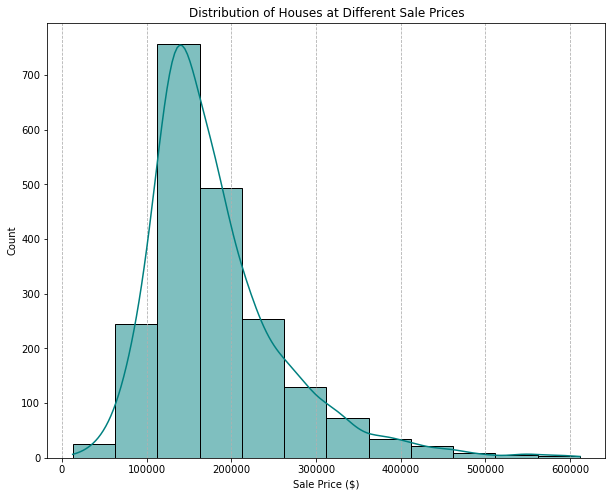

In [23]:
# Histogram of houses for different price ranges

plt.figure(figsize = (10,8))
sns.histplot(train.saleprice, kde = True, color = 'Teal', alpha = 0.5, bins = 12)
plt.title('Distribution of Houses at Different Sale Prices')
plt.xlabel('Sale Price ($)')
plt.grid(axis = 'x', linestyle = '--')

plt.savefig('Distribution_of_SalePrice.jpg')

/Users/tymac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Sale Price ($)')

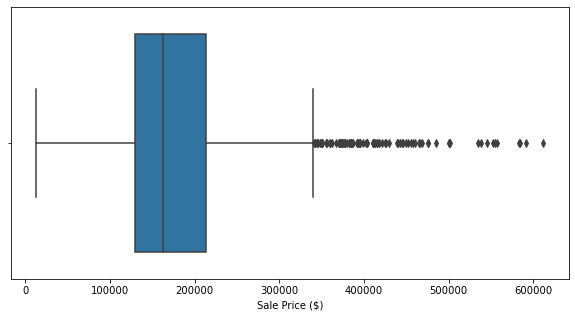

In [24]:
# Boxplot of house sale price to determine the 25th, 50th and 75 percentile data, as well as the minimum and
# maximum values.

plt.figure(figsize = (10,5))
sns.boxplot(train['saleprice'])
plt.xlabel('Sale Price ($)')

Based on the figure above, it can be observed that there are a few outliers at different house qualities, where one cost around \\$410,000 when the quality is only a 6; another house that was priced at more than \\$500,000 with a quality 0f 8; and another 3 houses of quality more than or equals to 9 that were priced lower than \\$200,000.

/Users/tymac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tymac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tymac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tymac/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tymac/opt/anaconda3/lib/python3.8/site-packages/s

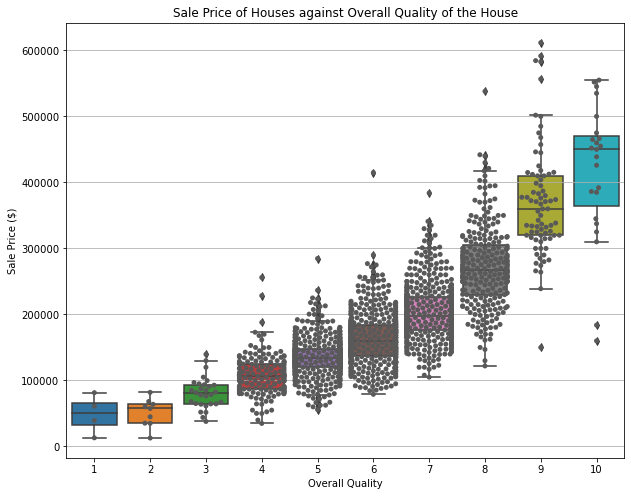

In [25]:
plt.figure(figsize = (10,8))
sns.swarmplot(x = 'overall_qual', y = 'saleprice',data = train, color = '.35')
sns.boxplot(x= 'overall_qual', y = 'saleprice', data = train)
plt.title('Sale Price of Houses against Overall Quality of the House')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price ($)')
plt.grid(axis = 'y')

plt.savefig('SalePrice_vs_Quality.jpg')

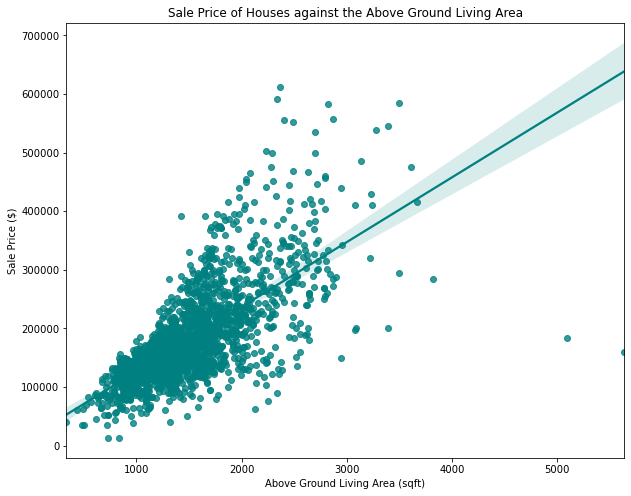

In [26]:
# Scatterp plot of sale price vs above ground living area

plt.figure(figsize = (10,8))
sns.regplot(x = 'gr_liv_area', y = 'saleprice',data = train, color = 'Teal')
plt.title('Sale Price of Houses against the Above Ground Living Area')
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Sale Price ($)')

plt.savefig('SalePrice_vs_GrLivArea.jpg')

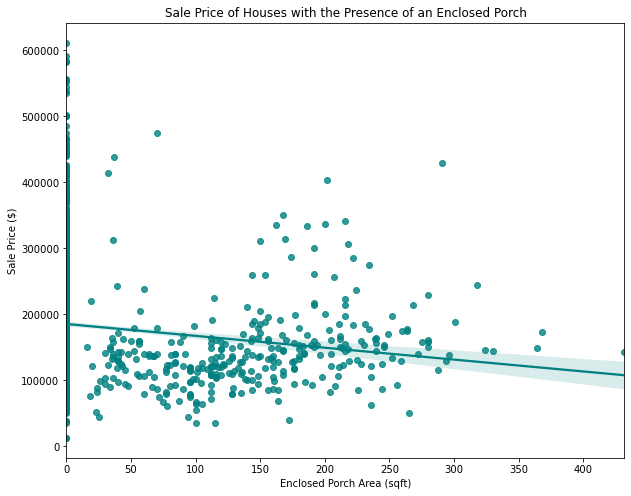

In [27]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'enclosed_porch', y = 'saleprice',data = train, color = 'Teal')
plt.title('Sale Price of Houses with the Presence of an Enclosed Porch')
plt.xlabel('Enclosed Porch Area (sqft)')
plt.ylabel('Sale Price ($)')

plt.savefig('SalePrice_vs_EnclosedPorch.jpg')

As observed within the several plots above, there were a few outliers that stood out from the trend. They do not take up a large percentage of the overall data, hence they will be dropped from the predictive modelling to ensure better accuracy during the modelling process.

### Dealing with Outliers

In [28]:
outlier1 = train[(train['gr_liv_area']>5000) & (train['saleprice']<300000)].index
train = train.drop(outlier1, axis = 0)

In [29]:
outlier2 = train[(train['overall_qual'] == 9) & (train['saleprice']<200000)].index
train = train.drop(outlier2, axis = 0)

In [30]:
outlier3 = train[(train['overall_qual'] == 8) & (train['saleprice']>500000)].index
train = train.drop(outlier3, axis = 0)

In [31]:
outlier4 = train[(train['overall_qual'] == 6) & (train['saleprice']>400000)].index
train = train.drop(outlier4, axis = 0)

### Getting Dummies

The numerical and categorical columns are separated accordingly. This allows for the categorical columns to be dummified all together and converted into a one-hot encoded matrix.

In [32]:
cat_train = train.select_dtypes(include = 'object')
num_train = train.select_dtypes(exclude = 'object')

In [33]:
num_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2050
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2046 non-null   int64  
 1   lot_frontage     2046 non-null   float64
 2   lot_area         2046 non-null   int64  
 3   overall_qual     2046 non-null   int64  
 4   overall_cond     2046 non-null   int64  
 5   year_built       2046 non-null   int64  
 6   year_remod/add   2046 non-null   int64  
 7   mas_vnr_area     2046 non-null   float64
 8   bsmtfin_sf_1     2046 non-null   float64
 9   bsmtfin_sf_2     2046 non-null   float64
 10  bsmt_unf_sf      2046 non-null   float64
 11  total_bsmt_sf    2046 non-null   float64
 12  1st_flr_sf       2046 non-null   int64  
 13  2nd_flr_sf       2046 non-null   int64  
 14  low_qual_fin_sf  2046 non-null   int64  
 15  gr_liv_area      2046 non-null   int64  
 16  bsmt_full_bath   2046 non-null   float64
 17  bsmt_half_bath

In [34]:
cat_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2050
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ms_zoning       2046 non-null   object
 1   street          2046 non-null   object
 2   lot_shape       2046 non-null   object
 3   land_contour    2046 non-null   object
 4   utilities       2046 non-null   object
 5   lot_config      2046 non-null   object
 6   land_slope      2046 non-null   object
 7   neighborhood    2046 non-null   object
 8   condition_1     2046 non-null   object
 9   condition_2     2046 non-null   object
 10  bldg_type       2046 non-null   object
 11  house_style     2046 non-null   object
 12  roof_style      2046 non-null   object
 13  roof_matl       2046 non-null   object
 14  exterior_1st    2046 non-null   object
 15  exterior_2nd    2046 non-null   object
 16  mas_vnr_type    2046 non-null   object
 17  exter_qual      2046 non-null   object
 18  exter_co

In [35]:
cat_train = pd.get_dummies(cat_train, drop_first = True)

In [36]:
final_train = pd.concat([num_train,cat_train], axis = 1)

In [37]:
final_train

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,60,69.0552,13517,6,8,1976,2005,289.0,533.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,60,43.0000,11492,7,5,1996,1997,132.0,637.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,20,68.0000,7922,5,7,1953,2007,0.0,731.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,60,73.0000,9802,5,5,2006,2007,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,50,82.0000,14235,6,8,1900,1993,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,79.0000,11449,8,5,2007,2007,0.0,1011.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2047,30,69.0552,12342,4,5,1940,1950,0.0,262.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2048,50,57.0000,7558,6,6,1928,1950,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2049,20,80.0000,10400,4,5,1956,1956,0.0,155.0,750.0,...,0,1,0,0,0,0,0,0,0,1


In [38]:
train.corr()['saleprice'].sort_values()

enclosed_porch    -0.136106
kitchen_abvgr     -0.125666
overall_cond      -0.100568
ms_subclass       -0.088710
bsmt_half_bath    -0.044992
low_qual_fin_sf   -0.041532
yr_sold           -0.017057
misc_val          -0.010051
bsmtfin_sf_2       0.017526
pool_area          0.026198
mo_sold            0.029881
3ssn_porch         0.049427
screen_porch       0.128787
bedroom_abvgr      0.131573
bsmt_unf_sf        0.191362
2nd_flr_sf         0.240984
garage_yr_blt      0.259561
half_bath          0.282380
bsmt_full_bath     0.285242
lot_area           0.293275
wood_deck_sf       0.318771
open_porch_sf      0.340729
lot_frontage       0.344537
bsmtfin_sf_1       0.444950
fireplaces         0.473326
totrms_abvgrd      0.507214
mas_vnr_area       0.515349
full_bath          0.534581
year_remod/add     0.552508
year_built         0.576374
1st_flr_sf         0.648479
garage_cars        0.650047
garage_area        0.655364
total_bsmt_sf      0.664974
gr_liv_area        0.718071
overall_qual       0

The correlation of the variables were checked again after the removal of outliers and and it was observed that there were increases in several variables like the Overall Quality (overall_qual), Above Ground Living Area (gr_liv_area), and Total Basement Area (total_bsmt_sf).

## Exporting Data

Exporting cleaned dataset to be used in separate modelling notebook.

In [39]:
final_train.to_csv('datasets/final_train_cleaned.csv', index = False)